In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy as np
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.special import gamma as gammaf
from scipy import stats
import seaborn as sns
import pandas as pd
import random
import time
import re

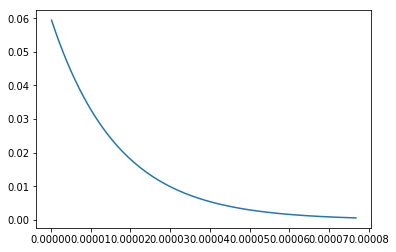

In [11]:
#from data_minion_reads import lire_tailles, lire_taille

def f(x, g, n):
    """
    fonction loi beta qui correspond à la distribution de la taille des reads
    :param x: taille des reads
    :param g: taille du génome
    :param n: nombre de fragments
    :return: fonction loi beta
    """
    return  (1/g)*n* (1 - x) ** (n - 1)

a=1
b=60000
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)
plt.plot(x, f(x,1000000,b))

In [12]:
monFichier = open("../Documents/Donnees/DRR164913.fastq", "r")
taille = []
f = []
norm = []

for line in monFichier:
    fields = line.strip().split()
    for idx, word in enumerate(fields):
        f.append(word)

for i, element in enumerate(f):
    if element.endswith("/1") and i + 1 < len(f):
        taille.append(len(f[i + 1]))

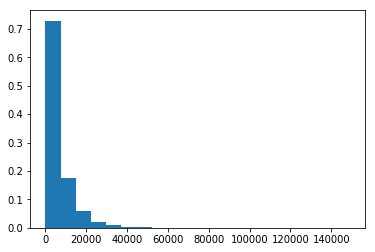

409995


In [14]:
weights = np.ones_like(taille) / float(len(taille))
plt.hist(taille, bins=20, weights=weights)
plt.show()
print(len(taille))

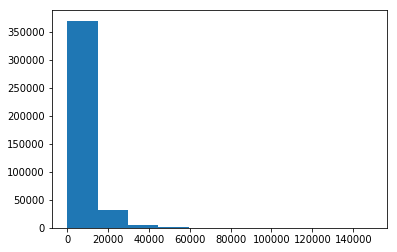

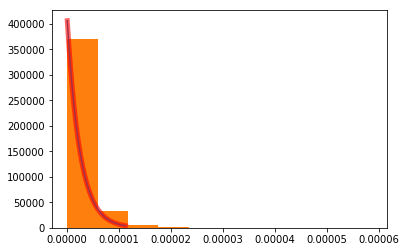

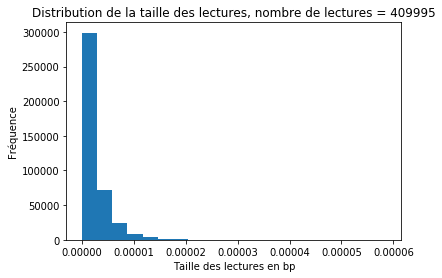

KstestResult(statistic=0.04830265699418829, pvalue=0.0)


In [6]:
#taille = lire_taille()
a=1
b=len(taille)
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)
plt.hist(taille)
plt.show()
t = sum(taille)

taille = [i / t for i in taille]
rv = beta(a, b)
plt.plot(x, rv.pdf(x))
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.hist(taille)
plt.show()

#weights = np.ones_like(taille) / float(len(taille))
plt.hist(taille, bins=20)
#plt.plot(x, f(x,t,b))
plt.title("Distribution de la taille des lectures, nombre de lectures = 409995")
plt.xlabel("Taille des lectures en bp")
plt.ylabel("Fréquence")
plt.show()

print(stats.kstest(taille, 'beta', args=(1, b)))


In [7]:
def betaNLL(param, *args):
    """
    Negative log likelihood function for beta
    <param>: list for parameters to be fitted.
    <args>: 1-element array containing the sample data.
    Return <nll>: negative log-likelihood to be minimized.
    """

    
    a, b = param
    data = args[0]
    pdf = beta.pdf(data,a,b,loc=0,scale=1)
    lg = np.log(pdf)
    #mask = np.isnan(lg)
    nll = -1*np.sum(lg)
    return nll

#----------------Normalize to [0,1]----------------

mean = np.mean(taille)
print(mean)
var = np.var(taille, ddof=1)
print(var)
alpha1 = mean ** 2 * (1 - mean) / var - mean
print(alpha1)
beta1 = alpha1 * (1 - mean) / mean
print(beta1)
print(taille)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
result = fmin(betaNLL, [1, 1], args=(taille,))
alpha2, beta2 = result
print(alpha2)

Optimization terminated successfully.
         Current function value: -4888854.325647
         Iterations: 138
         Function evaluations: 291
0.9710648661478025


In [9]:
alpha3, beta3, xx, yy = beta.fit(taille)
print(alpha3)
print(beta3)

/home/aghoul/venv/local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/aghoul/venv/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0.9571764431638554
213.45996994651853


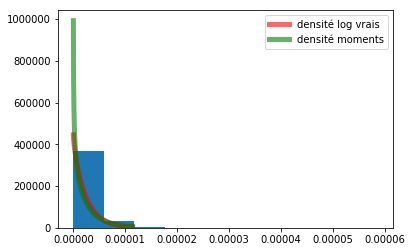

In [10]:
weights = np.ones_like(taille) / float(len(taille))

#plt.hist(taille, weights=weights)
fitted = lambda x, a, b: gammaf(a + b) / gammaf(a) / gammaf(b) * x ** (a - 1) * (1 - x) ** (b - 1)  # pdf of beta

xx = np.linspace(beta.ppf(0.01, alpha2, beta2), beta.ppf(0.99, alpha2, beta2), 60000)
plt.plot(xx, beta.pdf(xx, alpha2, beta2),'r-', lw=5, alpha=0.6, label='densité log vrais')
plt.plot(xx, beta.pdf(xx, alpha1, beta1),'g-', lw=5, alpha=0.6, label='densité moments')
plt.legend()
#plt.plot(xx, beta.pdf(xx, alpha3, beta3), lw=5, alpha=0.6, label='densité bêta(1,60000)')
#plt.plot(xx, fitted(xx, alpha1, beta1), 'g')
#plt.plot(xx, fitted(xx, alpha2, beta2), 'b')
#plt.plot(xx, fitted(xx, alpha3, beta3), 'r')


plt.hist(taille)

plt.show()
